In [1]:
import os
import sys
import numpy as np
from scipy import sparse
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'
from mpl_toolkits.mplot3d import Axes3D, axes3d
from scipy.cluster import hierarchy
import seaborn as sns
import spacy
import nltk
from konlpy.tag import Okt
import graphviz

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.feature_selection import SelectPercentile, f_classif, f_regression
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer, PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs
from sklearn.datasets import fetch_lfw_people
from sklearn.datasets import load_digits
from sklearn.datasets import make_moons

In [4]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)

In [5]:
scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [10]:
X_test == scaler.inverse_transform(X_test_sc)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [16]:
X, y = make_blobs(n_samples=50, centers=2, cluster_std=1, random_state=4)
X += 3

(0.0, 16.0)

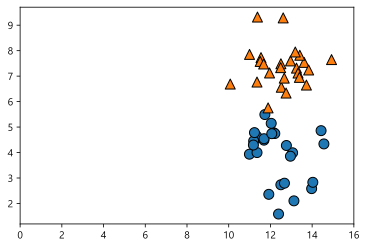

In [18]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlim(0, 16)

In [22]:
scaler = QuantileTransformer(n_quantiles=50, output_distribution='normal').fit(X)
X_sc = scaler.transform(X)

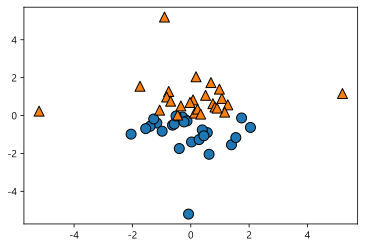

In [23]:
mglearn.discrete_scatter(X_sc[:, 0], X_sc[:, 1], y)

In [24]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)

In [26]:
svm = SVC(gamma='auto').fit(X_train, y_train)
svm.score(X_test, y_test)

0.6293706293706294

In [28]:
pipe = make_pipeline(MinMaxScaler(), SVC(gamma='auto')).fit(X_train, y_train)
pipe.score(X_test, y_test)

0.951048951048951

In [29]:
pipe = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(X_train, y_train)
pipe.score(X_test, y_test)

0.965034965034965

In [32]:
array = np.array([[7, 2, 3], [4, np.nan, 6], [10, 5, 9]])
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean').fit(array)
imp_mean.transform(array)

array([[ 7. ,  2. ,  3. ],
       [ 4. ,  3.5,  6. ],
       [10. ,  5. ,  9. ]])